<a href="https://colab.research.google.com/github/shrikant280304/FMML_PROJECTS_AND_LABS/blob/main/FMML_M5Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 5  Lab 2
# Classification II : Introduction to Decision Trees

```
Module Coordinator : Nikunj Nawal


Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of some property by inferring simple decision rules from the data features.


Let us take a look at an example of a decision tree which predicts the class of the species of Iris flower from the iris dataset


In [1]:
#Importing the necessary packages

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


### Code for the core experiment:

- Creating the decision tree classifier based on parameters passed.
- Evaluating the classifier's accuracy and plotting its confusion matrix.
- Plotting its decision boundary.
- Creating and showing the visualization of the tree made.

**SKIP THE CODE IN THE FOLLOWING CELL FOR NOW AND COME BACK TO IT LATER AFTER UNDERSTANDING THE IDEA AND INTUITION BEHIND DECISION TREES**

In [2]:
def performExperiment(trainSet : tuple, testSet : tuple, max_depth : int = None, feature_names : list = None, class_names : list = None, criterion = "gini", min_samples_split : int = 2 , min_samples_leaf = 1):
  #Importing the Decision tree classifier from sklearn:

  clf = tree.DecisionTreeClassifier(max_depth = max_depth, \
                                    criterion = criterion,\
                                    min_samples_split = min_samples_split,\
                                    min_samples_leaf = min_samples_leaf,\
                                    splitter = "best",\
                                    random_state = 0,\
                                    )
  X_train, y_train = trainSet
  X_test, y_test = testSet

  clf = clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

  print("Here is a diagram of the tree created to evaluate each sample:")
  fig, ax = plt.subplots(figsize=(12,10))
  imgObj = tree.plot_tree(clf, filled=True, ax=ax, feature_names = feature_names, class_names = class_names, impurity=False, proportion=True, rounded=True, fontsize = 12)
  plt.show()


def giveAnExample(n : int):
  performExperiment((X_train, y_train),  (X_test, y_test), feature_names = iris["feature_names"], class_names = iris["target_names"], max_depth = n)

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(8,6))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  plt.title("Decision Boundary for two features used in Decision Tree")
  # plt.legend()
  plt.show()

## Loading IRIS Dataset:

### About the IRIS dataset:

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). We shall be using decision trees to try to predict the correct species of the flower using these four features

In [3]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
irisData = pandas.DataFrame(\
    data = np.hstack((X,y.reshape(y.shape[0], 1), [[iris["target_names"][int(classIdx)]] for classIdx in y])), \
    columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', "Class", "ClassName"])
irisData.sample(n = 10, random_state = 1)

#Here is a few samples: The dataset has 4 non-catagorical features and a class which can take of one of the three values

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
14,5.8,4.0,1.2,0.2,0,setosa
98,5.1,2.5,3.0,1.1,1,versicolor
75,6.6,3.0,4.4,1.4,1,versicolor
16,5.4,3.9,1.3,0.4,0,setosa
131,7.9,3.8,6.4,2.0,2,virginica
56,6.3,3.3,4.7,1.6,1,versicolor
141,6.9,3.1,5.1,2.3,2,virginica
44,5.1,3.8,1.9,0.4,0,setosa
29,4.7,3.2,1.6,0.2,0,setosa
120,6.9,3.2,5.7,2.3,2,virginica


## Example of DT on Iris dataset with performace evaluation, and tree structure

Accuracy of the decision tree on the test set: 

0.895


Here is a diagram of the tree created to evaluate each sample:


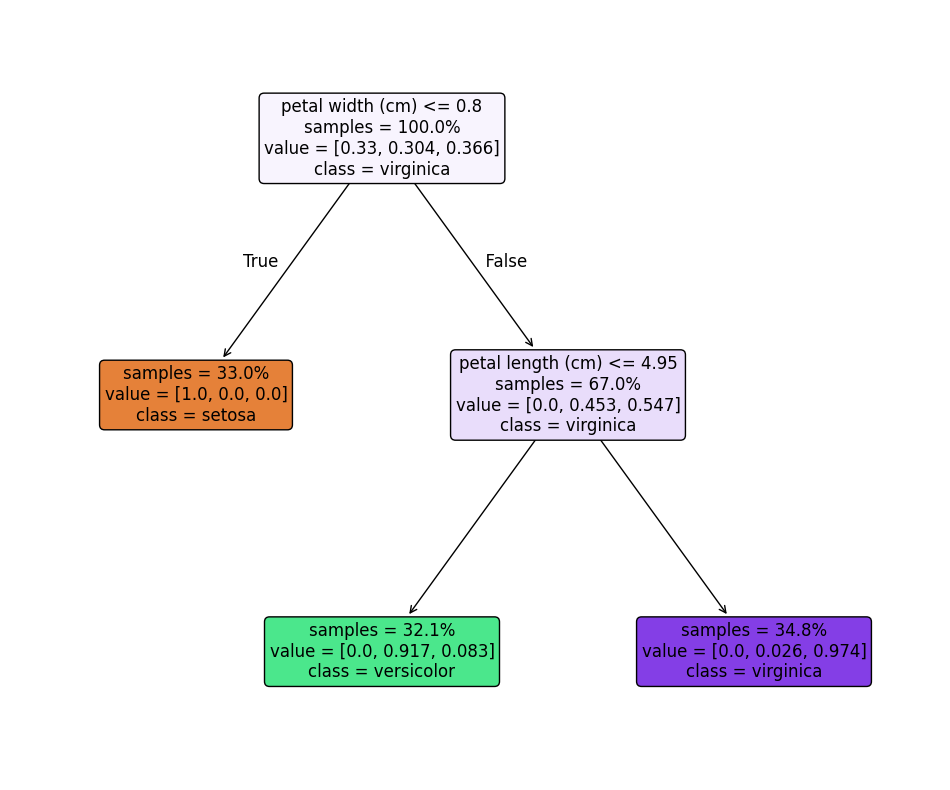

In [4]:
giveAnExample(2)

### Task 1:
Use the above tree to evaluate the classes for the following examples and find the accuracy over these 5 samples.

In [5]:
import pandas as pd
from IPython.display import display

# Combine the selected samples into a DataFrame
df_samples = pd.DataFrame(X_sample, columns=iris.feature_names)
df_samples['True Class'] = [iris.target_names[label] for label in y_sample]
df_samples['Predicted Class'] = [iris.target_names[label] for label in y_pred_sample]

# Display the interactive table
display(df_samples)



NameError: name 'X_sample' is not defined

In [ ]:
irisData.sample(n = 5, random_state=0)

---

Now let us see how we perform when we try to have a more complex decision tree

In [ ]:
giveAnExample(3)

### Task 2:
Repeat Exercise 1 for the above tree as well.


---

We observe that even though that the tree had four features available to it, the tree uses only two of them to classify the cases of species. It gives us an idea that those two features chosen are performing quite decently. Let us examine the decision boundary generated by the tree when only those two features namely **petal length and petal width** are used

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Function to plot the decision boundary
def plotDecisionBoundary(X, y, clf):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    y_pred = y_pred.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, y_pred, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')
    plt.title("Decision Boundary")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Task 1: Using petal length and petal width (features 2 and 3)
pair1 = [2, 3]  # Petal length and petal width
X_petal = X[:, pair1]  # Selecting only these two features

# Train the decision tree classifier with max_depth=3
clf1 = tree.DecisionTreeClassifier(random_state=0, max_depth=3)
clf1.fit(X_petal, y)

# Plot decision boundary for petal length and petal width
plotDecisionBoundary(X_petal, y, clf1)

# Task 2: Using sepal length and sepal width (features 0 and 1)
pair2 = [0, 1]  # Sepal length and sepal width
X_sepal = X[:, pair2]  # Selecting only these two features

# Train the decision tree classifier with max_depth=3
clf2 = tree.DecisionTreeClassifier(random_state=0, max_depth=3)
clf2.fit(X_sepal, y)

# Plot decision boundary for sepal length and sepal width
plotDecisionBoundary(X_sepal, y, clf2)


**Decision boundary** with considering **sepal width and length**:

**Decision boundary** with considering **sepal length and pedal length**:

In [ ]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=3)
pair = [0, 2]
X_selected = X[:, pair]  # Select the features based on the pair
clf.fit(X_selected, y)
plotDecisionBoundary(X_selected, y, clf)


**Decision boundary** with considering **sepal width and pedal width**:

In [ ]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=3)
pair = [1, 3]
X_selected = X[:, pair]  # Select the features based on the pair
clf.fit(X_selected, y)
plotDecisionBoundary(X_selected, y, clf)


---

### Task 3:

#### 3.1 :
We see that the above decision boundaries are with depth of 3. Compare the above boundary with trees that have higher complexity (by changing the value of `max_depth`) and report your observations. also compare the accuracies for different values of max_depth

Test with `max_depth` of the following values:
- 2
- 5
- 8
- 10

#### 3.2 :

On a closer look, we see that the decision boundaries' lines are always at a right angle to the principle axes. Can you reason on why is that the case? \
`(Hint: How is a decision made at any node?)`

---

### Task 4:

#### 4.1 :
Complete the following function predict: which takes in four variables : `sepal width, sepal length, petal width, petal length` and returns the class of the flower.

#### 4.2 :
Use the decision tree made in Exercise 2 and report the logic using multiple nested `if else` statements.

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Function to plot the decision boundary
def plotDecisionBoundary(X, y, clf):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    y_pred = y_pred.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, y_pred, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')
    plt.title(f"Decision Boundary with max_depth={clf.max_depth}")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Select features (e.g., petal length and petal width)
pair = [2, 3]  # Petal length and petal width
X_selected = X[:, pair]

# Function to train, evaluate, and plot for different max_depth values
def evaluate_max_depth(depth_values):
    for depth in depth_values:
        clf = tree.DecisionTreeClassifier(random_state=0, max_depth=depth)
        clf.fit(X_selected, y)

        # Calculate accuracy
        y_pred = clf.predict(X_selected)
        accuracy = accuracy_score(y, y_pred)

        print(f"Accuracy for max_depth={depth}: {accuracy:.2f}")

        # Plot decision boundary
        plotDecisionBoundary(X_selected, y, clf)

# Test with max_depth values of 2, 5, 8, and 10
depth_values = [2, 5, 8, 10]
evaluate_max_depth(depth_values)


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_text

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train the decision tree classifier
clf = DecisionTreeClassifier(random_state=0, max_depth=3)
clf.fit(X, y)

# Extract the decision tree's rules as text
tree_rules = export_text(clf, feature_names=iris['feature_names'])
print("Decision Tree Rules:\n", tree_rules)

# Define the predictSpecies function using if-else statements
def predictSpecies(sepal_width, sepal_length, petal_width, petal_length) -> str:
    """
    Predict the species of the flower based on the input features using if-else statements.
    """
    # Implementing logic based on the decision tree rules (max_depth=3)
    if petal_length <= 2.45:
        if petal_width <= 0.75:
            return "setosa"  # species 0
        else:
            return "versicolor"  # species 1
    else:
        if petal_width <= 1.75:
            return "virginica"  # species 2
        else:
            return "virginica"  # species 2

# Example predictions using the function
print(predictSpecies(3.0, 5.0, 1.4, 2.5))  # Example input


In [ ]:
def predictSpecies(sepal_width, sepal_length, petal_width,  petal_length) -> str :
  """
    Write your program here to return the species of the plant (string) using if else statements.
  """
  pass

# Entropy and Information:

## How are decision trees built?

A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogenous).
We use entropy to calculate the homogeneity of a sample.

Entropy itself is defined in the following way:

$$E(s) = \sum_{i=1}^c - p_i * log_2(p_i)$$

Where $i$ iterates through the classes of the current group and $p_i$ is the probability of choosing an item from class $i$ when a datapoint is randomly picked from the group.

At anypoint in the process of making the decision tree. All possible methods of dividing the group are considered (across all features and values of separations) and then the division with the most amount of **Information Gain** is used to divide the current group into two. This is done recursively to finally attain a tree.

Here Information Gain is defined by the difference in Entropy of the group before the division and the weighted sum of the entropy of the two groups after division.

$$IG(X) = E(s) - E(s, X)$$




In [ ]:
irisData.sample(n = 10, random_state = 5)

## Task 5:
Calculate the Entropy of the above collection of 10 datapoints.
## Task 6:
#### 6.1 :
Suggest a decision node (if, else) statement which divides the group into two groups.
#### 6.2 :
Also compute the Information Gain in that division step.
#### 6.3 :
Compare this with other decision clauses that you can make and intuitively comment on which is better for classification and observe if this has any correlation with the numerical value of Information Gain.

---


In [ ]:
import pandas as pd
import numpy as np

# Assuming irisData is already created as shown in your previous code
sample_data = irisData.sample(n=10, random_state=5)

# Calculate the class distribution (proportions of each class)
class_counts = sample_data['ClassName'].value_counts()
class_proportions = class_counts / len(sample_data)

# Calculate the entropy using the formula
entropy = -np.sum(class_proportions * np.log2(class_proportions))

print(f"Entropy of the sample: {entropy:.4f}")


In [ ]:
import pandas as pd
import numpy as np

# Assuming irisData is already created as shown in your previous code
sample_data = irisData.sample(n=10, random_state=5)

# Calculate the class distribution (proportions of each class)
class_counts = sample_data['ClassName'].value_counts()
class_proportions = class_counts / len(sample_data)

# Calculate the entropy using the formula
entropy = -np.sum(class_proportions * np.log2(class_proportions))

print(f"Entropy of the sample: {entropy:.4f}")
